## Observations and Insights 

In [143]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import tkinter
%pylab inline
import pandas as pd
from itertools import cycle, islice
from functools import reduce
from scipy.stats import linregress
import scipy.stats as st
import numpy as np
pd.options.mode.chained_assignment = None 

# Study data files
#athlete_events_path = "data_set/athlete_events.csv"
olympic_medals_path = "data_set/olympic_medals_clean.csv"
Countrys_GDP_path = "data_set/Country_wise_GDP_from_1994_to_2017.csv"

# Read the olympics data and the study results
medals_Year = []
#athlete_events = pd.read_csv(athlete_events_path)
olympic_medals = pd.read_csv(olympic_medals_path)
Countrys_GDP = pd.read_csv(Countrys_GDP_path)
medals_Year = olympic_medals['slug_game'].str[-4:]
olympic_medals['medals_Year'] = medals_Year.astype('int64')
# Concatinate athletes name in olympic medals file to come up with full name that can be used to merge with athlete_events file 


Populating the interactive namespace from numpy and matplotlib


In [144]:
diff_cols = Countrys_GDP.columns.difference(olympic_medals.columns)

In [145]:
diff_cols

Index(['Country', 'GDP (in USD)', 'GDP Real (in USD)', 'GDP change (%)',
       'GDP per capita (in USD)', 'Pop. change (%)', 'Population', 'Year'],
      dtype='object')

In [146]:
#Filter out the columns that are different. You could pass in the df2[diff_cols] directly into the merge as well.
Diff_GDP_columns = Countrys_GDP[diff_cols]

olympic_medals['Medal_Won'] = np.where(olympic_medals.loc[:,'medal_type']== 'na',0, 1)

#Merge the DataFrames
df_merged = pd.merge(olympic_medals, Diff_GDP_columns, right_on=['Country','Year'],left_on=['country_name','medals_Year'], how='inner')

In [147]:
country_medal_tally = olympic_medals.groupby(['medals_Year','country_name'])['Medal_Won'].agg('sum').reset_index()
country_medal_tally

,medals_Year,country_name,Medal_Won
0,1896,Australia,2
1,1896,Austria,5
2,1896,Denmark,6
3,1896,France,11
4,1896,Germany,13
...,...,...,...
1425,2018,Spain,2
1426,2018,Sweden,15
1427,2018,Switzerland,16
1428,2018,Ukraine,1


In [148]:
Summer_olympics  = country_medal_tally.loc[country_medal_tally['medals_Year'].isin([1996,2000,2004,2008,2012,2016])]

Summer_olympics['medals_Year']=Summer_olympics['medals_Year'].astype(str)

In [149]:
# List of top countries
top_countries =  ['United States of America', 'Germany', "People's Republic of China", 'Russia','Australia']

Summer_year_country_medals = pd.pivot_table(Summer_olympics,
                                  index = 'medals_Year',
                                  columns = 'country_name',
                                  values = 'Medal_Won') [top_countries]
Summer_year_country_medals

country_name,United States of America,Germany,People's Republic of China,Russia,Australia
medals_Year,,,,,
1996,106.0,71.0,59.0,63.0,51.0
2000,102.0,64.0,75.0,93.0,69.0
2004,106.0,57.0,79.0,95.0,56.0
2008,116.0,49.0,117.0,67.0,52.0
2012,112.0,49.0,104.0,73.0,40.0
2016,127.0,48.0,82.0,59.0,34.0


Text(0.5, 1.0, 'Summer Olympic Performance Comparison')

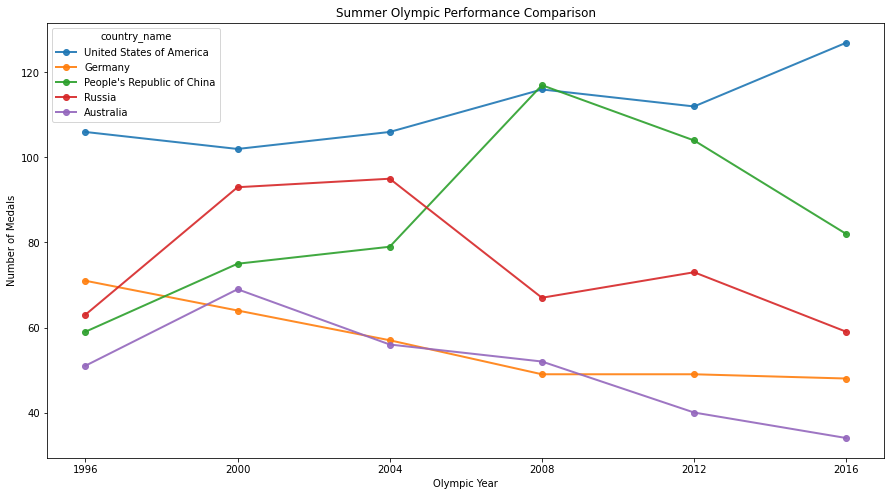

In [150]:
#plotting the medal tallies

Summer_year_country_medals.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (15,8), linewidth = 2)

xlabel('Olympic Year')
ylabel('Number of Medals')
title('Summer Olympic Performance Comparison')

In [151]:
Winter_olympics  = olympic_medals.loc[olympic_medals['medals_Year'].isin([1998,2002,2006,2010,2014,2018])]

Winter_olympics['medals_Year']=Winter_olympics['medals_Year'].astype(str)

In [152]:
# List of top countries
top_countries = ['United States of America', 'Germany', "People's Republic of China", 'Russia','Australia']

Winter_year_country_medals = pd.pivot_table(Winter_olympics,
                                  index = 'medals_Year',
                                  columns = ['country_name'],
                                  values = 'Medal_Won',
                                  aggfunc = 'sum')[top_countries]

Winter_year_country_medals

country_name,United States of America,Germany,People's Republic of China,Russia,Australia
medals_Year,,,,,
1998,15.0,32.0,8.0,22.0,1.0
2002,37.0,40.0,9.0,15.0,2.0
2006,27.0,32.0,13.0,25.0,2.0
2010,39.0,36.0,13.0,19.0,3.0
2014,32.0,21.0,9.0,33.0,3.0
2018,26.0,36.0,10.0,18.0,3.0


Text(0.5, 1.0, 'Winter Olympic Performance Comparison')

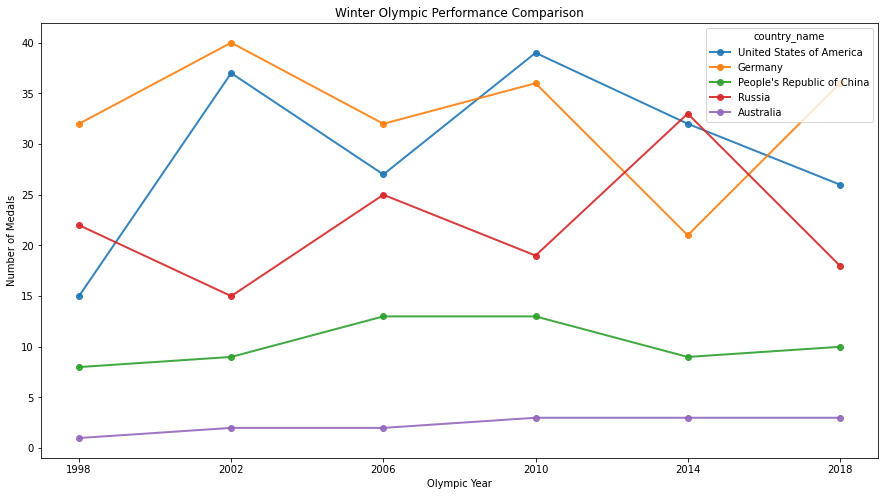

In [153]:
# plotting the medal tallies

Winter_year_country_medals.plot(linestyle = '-', marker = 'o', alpha = 0.9,figsize = (15,8),  linewidth = 2)

xlabel('Olympic Year')
ylabel('Number of Medals')
title('Winter Olympic Performance Comparison')

In [154]:
identify_team_events = olympic_medals.loc[olympic_medals['participant_type'] == 'GameTeam']

team_sports = identify_team_events['discipline_title'].unique()

In [166]:
identify_team_events_agg = identify_team_events.\
groupby(['country_name'])[['Medal_Won']].\
agg('sum').reset_index()

identify_team_events_agg_sorted = identify_team_events_agg.sort_values(by='Medal_Won', ascending=False)

identify_team_events_agg_sorted.head(5)

,country_name,Medal_Won
23,Germany,729
71,United States of America,706
57,Russia,517
25,Great Britain,401
22,France,318


In [167]:
identify_individual_events = olympic_medals.loc[olympic_medals['participant_type'] == 'Athlete']

individual_sports = identify_team_events['discipline_title'].unique()

In [171]:
identify_individual_events_agg = identify_individual_events.\
groupby(['country_name'])[['Medal_Won']].\
agg('sum').reset_index()

identify_individual_events_agg_sorted = identify_individual_events_agg.sort_values(by='Medal_Won', ascending=False)

identify_individual_events_agg_sorted.head(5)

,country_name,Medal_Won
132,United States of America,2239
100,Russia,1372
42,Germany,1185
39,France,578
44,Great Britain,571


In [172]:
events_medal_agg = df_merged.\
groupby(['Country','medal_type'])[['Medal_Won']].\
agg('sum').reset_index()

events_medal_agg_sorted = events_medal_agg.sort_values(by='Medal_Won', ascending=False)

events_medal_agg_sorted.head(5)

,Country,medal_type,Medal_Won
249,United States of America,GOLD,310
250,United States of America,SILVER,272
248,United States of America,BRONZE,250
176,People's Republic of China,GOLD,242
194,Russia,GOLD,213


Text(0, 0.5, 'Country')

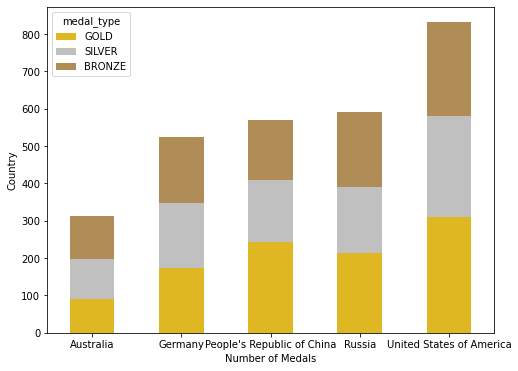

In [159]:
top_countries = ['United States of America', 'Germany', "People's Republic of China", 'Russia','Australia']

# row mask where countries match

row_mask_2 = df_merged['Country'].map(lambda x: x in top_countries)

medal_tally_specific = pd.pivot_table(df_merged[row_mask_2],
                                     index = ['Country'],
                                     columns = 'medal_type',
                                     values = 'Medal_Won',
                                     aggfunc = 'sum',
                                     fill_value = 0)

medal_tally_specific = medal_tally_specific.loc[:, ['GOLD', 'SILVER', 'BRONZE']]

medal_tally_specific.plot(kind = 'bar', stacked = True, figsize = (8,6), rot = 0 ,color = ['#DFB722', '#C0C0C0', '#b08d57']
                         )
xlabel('Number of Medals')
ylabel('Country')

In [160]:
events_medal_agg = df_merged.\
groupby(['Country','Year','Population'])[['Medal_Won']].\
agg('sum').reset_index()

events_medal_agg_sorted = events_medal_agg.sort_values(by='Medal_Won', ascending=False)

events_medal_agg_sorted.head(5)

,Country,Year,Population,Medal_Won
562,United States of America,2016,323015995,127
392,People's Republic of China,2008,1353569484,117
558,United States of America,2008,303486012,116
560,United States of America,2012,314043885,112
552,United States of America,1996,268335003,106
